<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [37]:
# 1. Load Data
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

In [38]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [39]:
print(X_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [40]:
print(y_train[0])

15.2


In [41]:
X_train.shape

(404, 13)

In [42]:
X_train[0].shape

(13,)

In [43]:
y_train.shape

(404,)

In [44]:
# 2. Normalize Data

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [45]:
# 3. Import Model & Layers 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

np.random.seed(812)

In [46]:
# 4. Instantiate Model & layers 

inputs = X_train.shape[1]
epochs = 50 
batch_size = 10 

from keras.callbacks import History 
history = History()

model = Sequential()
    
model.add(Dense(64, input_dim=13, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='linear'))

In [47]:
# 5. Compile Model 

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 6. Fit Model

results = model.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          epochs = epochs,
          batch_size = batch_size) 
          

Epoch 1/50
41/41 [==============================] - 0s 5ms/step - loss: 496.5319 - mse: 496.5319 - mae: 20.2707 - val_loss: 397.4509 - val_mse: 397.4509 - val_mae: 17.8037
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 228.5244 - mse: 228.5244 - mae: 12.4983 - val_loss: 102.6202 - val_mse: 102.6202 - val_mae: 8.2583
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 59.8875 - mse: 59.8875 - mae: 5.7808 - val_loss: 46.3141 - val_mse: 46.3141 - val_mae: 5.2211
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 33.0650 - mse: 33.0650 - mae: 4.1446 - val_loss: 32.1367 - val_mse: 32.1367 - val_mae: 4.2948
Epoch 5/50
41/41 [==============================] - 0s 1ms/step - loss: 24.6061 - mse: 24.6061 - mae: 3.5052 - val_loss: 27.3791 - val_mse: 27.3791 - val_mae: 4.0686
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 21.4903 - mse: 21.4903 - mae: 3.3093 - val_loss: 26.0272 - val_mse: 26.0272 - val_mae: 

In [53]:
# 7. Graph of Model's loss 

results.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

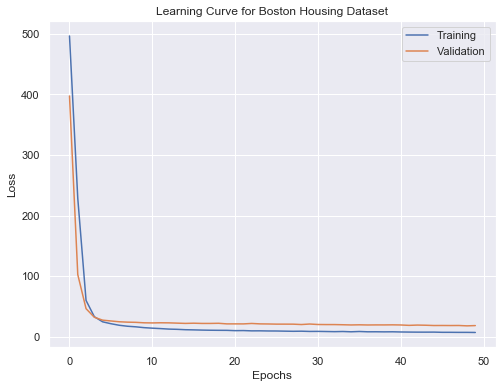

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))
plt.plot(results.history['loss'], label='Training')
plt.plot(results.history['val_loss'], label='Validation')
plt.title('Learning Curve for Boston Housing Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [55]:
# Linear Regression Model 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Train error:", mse)

Train error: 20.982945190702573


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [56]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

import numpy as np

In [57]:
# Load the Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [60]:
X_train = X_train / 255
X_test = X_test / 255
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [61]:
# Correct encoding on y
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000, 10)


In [65]:
model = Sequential([Flatten(input_shape=(28, 28))])

model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 837us/step - loss: 1.0209 - accuracy: 0.6176
Epoch 2/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.6637 - accuracy: 0.7576
Epoch 3/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.5837 - accuracy: 0.7898
Epoch 4/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.5353 - accuracy: 0.8098
Epoch 5/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.5025 - accuracy: 0.8209
Epoch 6/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.4771 - accuracy: 0.8309
Epoch 7/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.4561 - accuracy: 0.8386
Epoch 8/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.4404 - accuracy: 0.8432
Epoch 9/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.4254 - accuracy: 0.8463
Epoch 10/10
1875/1875 [==============================] - 2s 895u

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 649us/step - loss: 0.4485 - accuracy: 0.8405


[0.4484764039516449, 0.840499997138977]

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.